In [8]:
from typing import Tuple
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
# from utils import *
import matplotlib.pyplot as plt
import numpy as np


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [9]:
def plot_map(map):
    print(map.shape)
    plt.imshow(map, cmap='BuGn')

In [10]:
# map =  torch.tensor([
#     [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
#     [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
#     [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
#     [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
#     [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
#     [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
#     [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
#     [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
#     [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
#     [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
#     [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
#     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# ], dtype=torch.float32)

# map =  torch.tensor([
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
#     [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
#     [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
#     [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
#     [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
#     [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
#     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# ], dtype=torch.float32)

# start = (0, 10)
# goal = (10, 10)

map =  torch.tensor([
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
], dtype=torch.float32)

start = (1, 10)
goal = (10, 1)

# map =  torch.tensor([
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
# ], dtype=torch.float32)

# start = (5, 10)
# goal = (5, 1)

# Flood Fill Algorithm

https://en.wikipedia.org/wiki/Flood_fill

Goal is reachable


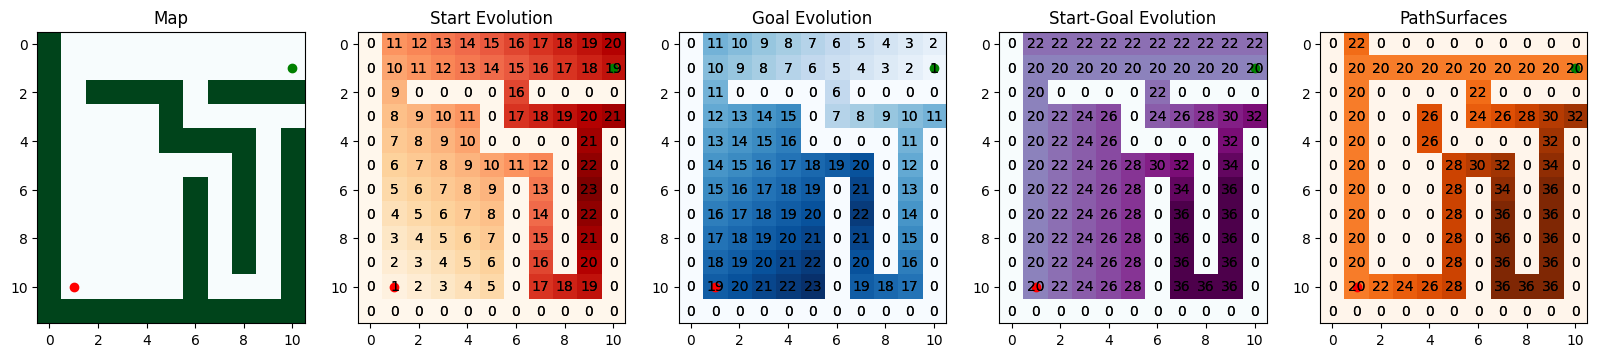

In [11]:



from math import sqrt


def create_heatmap(map, start, goal, max_steps):

    # Define the convolutional layer
    conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1)
    conv_layer.weight = nn.Parameter(torch.tensor(
        [
            [
                [
                    [0, 1, 0],
                    [1, 0, 1],
                    [0, 1, 0],
                ]
            ]
        ],
        dtype=torch.float32,
    ))
    conv_layer.bias = nn.Parameter(torch.tensor([0], dtype=torch.float32))

    conv_layer2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1)
    conv_layer2.weight = nn.Parameter(torch.tensor(
        [
            [
                [
                    [0, 0, 0],
                    [1, 0, 1],
                    [1, 1, 1],
                    # [1, 1, 1],
                    # [1, 0, 1],
                    # [1, 1, 1],
                ]
            ]
        ],
        dtype=torch.float32,
    ))
    conv_layer2.bias = nn.Parameter(torch.tensor([0], dtype=torch.float32))

    save_map_objects = map == 1
    empty_map = map == 0

    connecting_space1 = torch.zeros_like(map, dtype=torch.int)
    connecting_space1[start[1], start[0]] = 1
    connecting_space2 = torch.zeros_like(map, dtype=torch.int)
    connecting_space2[goal[1], goal[0]] = 1

    for step in range(2, max_steps+2):
        next_connections1 = empty_map & (conv_layer(connecting_space1.float().reshape(1, 1, *map.shape)).reshape(*map.shape) > 0)
        connecting_space1 = connecting_space1 + ((connecting_space1 == 0) & next_connections1) * step
        next_connections2 = empty_map & (conv_layer(connecting_space2.float().reshape(1, 1, *map.shape)).reshape(*map.shape) > 0)
        connecting_space2 = connecting_space2 + ((connecting_space2 == 0) & next_connections2) * step
        
    connecting_space = (connecting_space1 + connecting_space2)
    
    if connecting_space[goal[1], goal[0]]:
        print('Goal is reachable')
    else:
        print('Goal is not reachable')

    fig, ax = plt.subplots(1, 5, figsize=(20, 4))
    
    ax[0].imshow(map, cmap='BuGn')
    ax[0].title.set_text('Map')
    ax[1].imshow(connecting_space1, cmap='OrRd')
    ax[1].title.set_text('Start Evolution')
    for (j,i),label in np.ndenumerate(connecting_space1):
        ax[1].text(i,j,label,ha='center',va='center')
        ax[1].text(i,j,label,ha='center',va='center')

    ax[2].imshow(connecting_space2, cmap='Blues')
    ax[2].title.set_text('Goal Evolution')
    for (j,i),label in np.ndenumerate(connecting_space2):
        ax[2].text(i,j,label,ha='center',va='center')
        ax[2].text(i,j,label,ha='center',va='center')

    ax[3].imshow(connecting_space, cmap='BuPu')
    ax[3].title.set_text('Start-Goal Evolution')
    for (j,i),label in np.ndenumerate(connecting_space):
        ax[3].text(i,j,label,ha='center',va='center')
        ax[3].text(i,j,label,ha='center',va='center')

    path_surfaces = (connecting_space) * (conv_layer2(save_map_objects.float().reshape(1, 1, *map.shape)).reshape(*map.shape) > 0)
    ax[4].imshow(path_surfaces, cmap='Oranges')
    for (j,i),label in np.ndenumerate(path_surfaces):
        ax[4].text(i,j,label,ha='center',va='center')
        ax[4].text(i,j,label,ha='center',va='center')
    ax[4].title.set_text('PathSurfaces')

    ax[0].scatter(start[0], start[1], marker='o', color='red')
    ax[0].scatter(goal[0], goal[1], marker='o', color='green')
    ax[1].scatter(start[0], start[1], marker='o', color='red')
    ax[1].scatter(goal[0], goal[1], marker='o', color='green')
    ax[2].scatter(start[0], start[1], marker='o', color='red')
    ax[2].scatter(goal[0], goal[1], marker='o', color='green')
    ax[3].scatter(start[0], start[1], marker='o', color='red')
    ax[3].scatter(goal[0], goal[1], marker='o', color='green')
    ax[4].scatter(start[0], start[1], marker='o', color='red')
    ax[4].scatter(goal[0], goal[1], marker='o', color='green')


with torch.no_grad():
    create_heatmap(map, start, goal, max_steps=30)